## Subject 2: Purchasing power of English workers from the 16th to the 19th century

In this computational document we will explain the relation between the salary of english workers with the price of wheat. As mentioned in the mooc exercise, we will first try to reproduce the visualization by William Playfair then try to do some improvements.

### Step 0 : Import the data from the web and filter incomplete rows
First we need to import the data from the provided link, then we apply a little preprocessing by filtering the inclomplete rows because we consider every column is important.

In [49]:
from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv')
data = data.dropna()
data.tail()

Unnamed: 0  Year  Wheat  Wages
45          46  1790   47.5   25.5
46          47  1795   76.0   27.5
47          48  1800   79.0   28.5
48          49  1805   81.0   29.5
49          50  1810   99.0   30.0

In [2]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/3/3a/Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat%2C_and_Wages_of_Labour_by_the_Week%2C_from_1565_to_1821.png", width=500, height=500)

### Step 1 : Build the graph similar to William Playfair's graph
The first step is to build graph corresponds to visualization by William Playfair shown above.
Note that in this graph we are showing a much more simple visualization compared to the original one. We simply use two basic plots which represent wages and the price of wheat. Nevertheless, the impression we obtained from it is the same, which is the price of wheat seems to have relation with the workers's wages. 

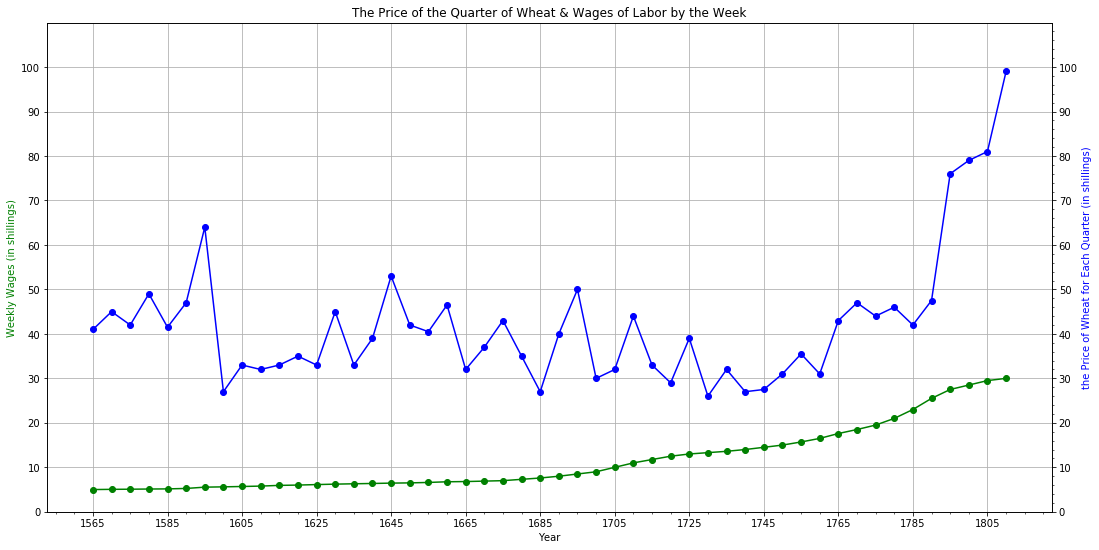

In [48]:
xax = data['Year']
yaxwages = data['Wages']
yaxwheat = data['Wheat']

fig,ax1 = plt.subplots()
plt.yticks(np.arange(0, 110, 10.0))
ax2 = ax1.twinx()
ax1.plot(xax, yaxwages, 'og-')
ax1.set_ylim([0,110])
ax2.plot(xax, yaxwheat, 'ob-')
ax2.set_ylim([0,110])

ax1.set(xlabel='Year', title='The Price of the Quarter of Wheat & Wages of Labor by the Week')
ax1.grid()
ax1.set_ylabel('Weekly Wages (in shillings)', color='g')
ax2.set_ylabel('the Price of Wheat for Each Quarter (in shillings)', color='b')

plt.yticks(np.arange(0, 110, 10.0))
plt.xticks(np.arange(min(xax), max(xax), 20))
plt.rcParams["figure.figsize"] = (18,9)
plt.minorticks_on()
plt.show()

### Step 2 : Improve the units and the data presentation
We would like to make our graph more relatable by changing the unit 'shillings' into 'poundsterling' which is the current currency in England. Secondly, the notion of a 'Quarter' is also not fammiliar these days, therefore we will change the unit of the wheat's weight into metric system kilograms (kg). To achieve of all these conversions we simply apply the following operations.

In [4]:
datanewcopy = data.copy()
datanew = data.copy()
datanew['Wheat'] = datanewcopy['Wheat'] / (6.8 * 20)
datanew['Wages'] = datanewcopy['Wages'] / 20
datanew.head()

Unnamed: 0  Year     Wheat   Wages
0           1  1565  0.301471  0.2500
1           2  1570  0.330882  0.2525
2           3  1575  0.308824  0.2540
3           4  1580  0.360294  0.2560
4           5  1585  0.305147  0.2575

Then we plot again the same graph with the newly converted data, and also we need to change the labels.

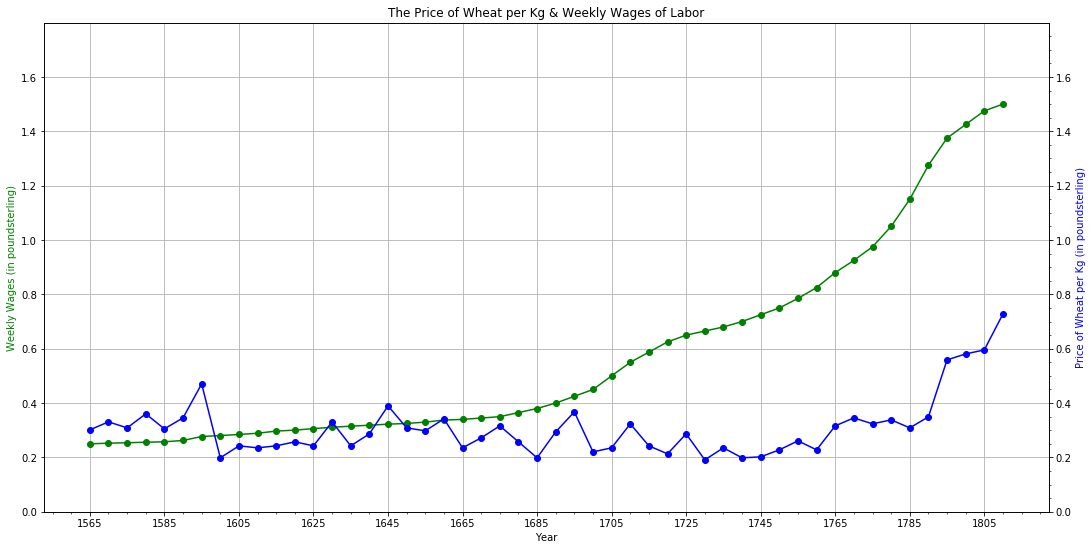

In [50]:
xax = datanew['Year']
yaxwages = datanew['Wages']
yaxwheat = datanew['Wheat']

fig,ax1 = plt.subplots()
plt.yticks(np.arange(0, 1.80, .2))

ax2 = ax1.twinx()
ax1.plot(xax, yaxwages, 'og-')
ax1.set_ylim([0,1.8])
ax2.plot(xax, yaxwheat, 'ob-')
ax2.set_ylim([0,1.8])

ax1.set(xlabel='Year', title='The Price of Wheat per Kg & Weekly Wages of Labor')
ax1.grid()
ax1.set_ylabel('Weekly Wages (in poundsterling)', color='g')
ax2.set_ylabel('Price of Wheat per Kg (in poundsterling)', color='b')

plt.yticks(np.arange(0, 1.80, .2))
plt.xticks(np.arange(min(xax), max(xax), 20))
plt.rcParams["figure.figsize"] = (18,9)
plt.minorticks_on()
plt.show()

### Step 3 : Improve the graph
1. As mentioned in the exercise, one way to improve the presentation is to explicitly show the purchasing power of the workers in the graph. We can do this by plotting (on y-axis) how much wheat (in kg) can a worker buy with his/her weekly salary.



In [6]:
datanewcolumn = data.copy()
datanewcolumn['Power'] = (data['Wages'] / data['Wheat']) * 6.8
datanewcolumn.head()

Unnamed: 0  Year  Wheat  Wages     Power
0           1  1565   41.0   5.00  0.829268
1           2  1570   45.0   5.05  0.763111
2           3  1575   42.0   5.08  0.822476
3           4  1580   49.0   5.12  0.710531
4           5  1585   41.5   5.15  0.843855

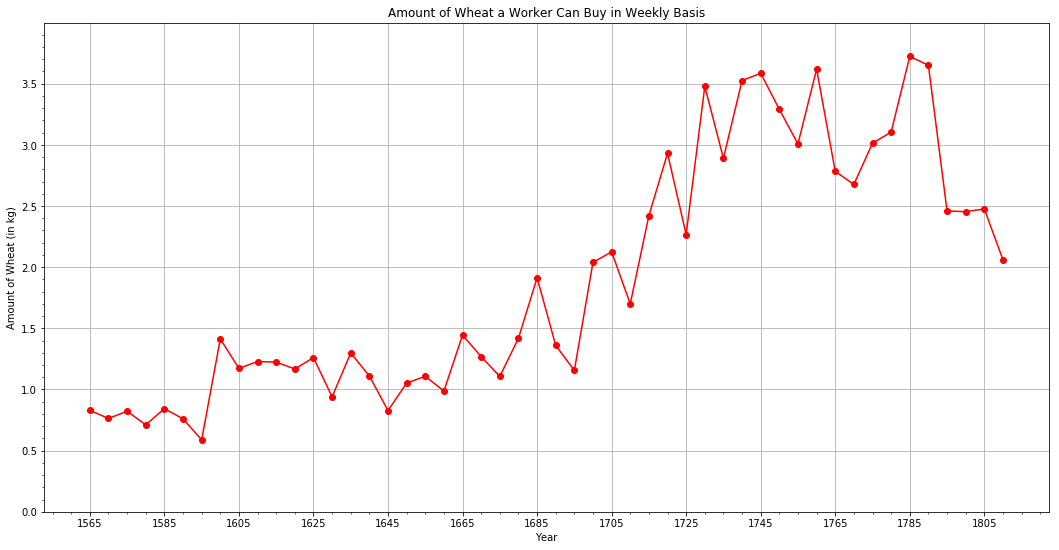

In [51]:
xax = datanewcolumn['Year']
yax = datanewcolumn['Power']

fig,ax1 = plt.subplots()
plt.yticks(np.arange(0, 4, .5))

ax1.plot(xax, yax, 'or-')
ax1.set_ylim([0,4])

ax1.set(xlabel='Year', title='Amount of Wheat a Worker Can Buy in Weekly Basis')
ax1.grid()
ax1.set_ylabel('Amount of Wheat (in kg)', color='black')

plt.xticks(np.arange(min(xax), max(xax), 20))
plt.rcParams["figure.figsize"] = (18,9)
plt.minorticks_on()
plt.show()

2. For the second visualization we will use wages as x-axis and wheat's price as y-axis. While the time advancement will be represented as years scattered

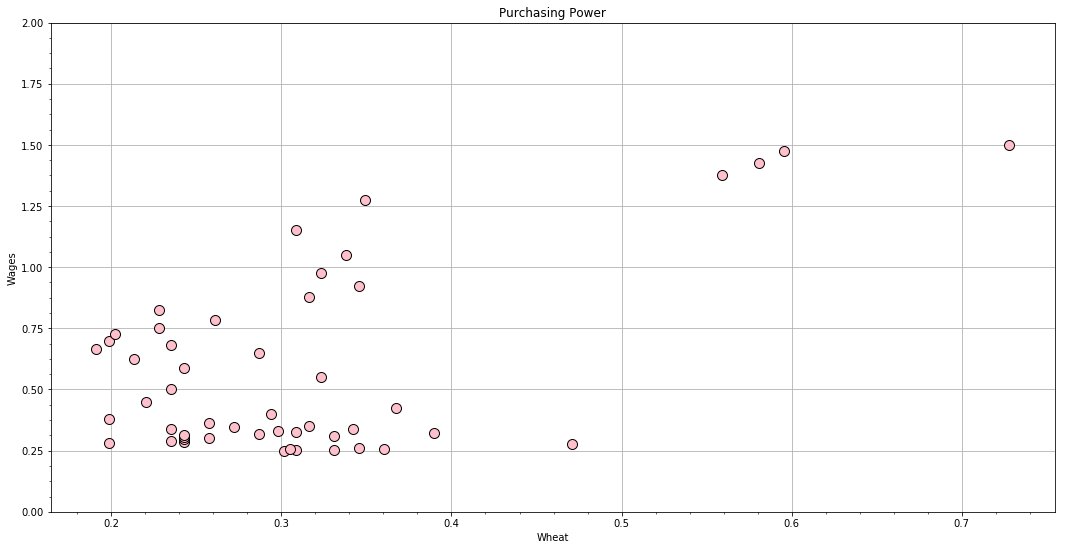

In [60]:
xax = datanew['Wheat']
yax = datanew['Wages']

fig,ax1 = plt.subplots()

ax1.plot(xax, yax, 'o', markeredgecolor='black', markerfacecolor='pink', markersize = 10)
ax1.set_ylim([0,2])

ax1.set(xlabel='Wheat', title='Purchasing Power')
ax1.grid()
ax1.set_ylabel('Wages', color='black')

plt.rcParams["figure.figsize"] = (18,9)
plt.minorticks_on()
plt.show()